In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
#getting data

os.listdir()
data = pd.read_csv("train.csv")

data.shape

(1460, 81)

In [5]:
# count NaN values
def nancount(data):
    L = data.isna().sum()
    res = {}
    for i in range(len(L)):
        if L[i] > 0:
            #print("{} : {}".format(L.index[i], L[i]))
            res[L.index[i]] = L[i]
    for key, value in sorted(res.items(), key=lambda item: item[1]):
        if value > 0:
            print("\'{}\'".format(key), end = ",")

In [6]:
nancount(data)

'Electrical','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','LotFrontage','FireplaceQu','Fence','Alley','MiscFeature','PoolQC',

In [7]:
_data = data.fillna('NA', inplace = False)
_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [8]:
_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
_data.describe().T.index

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [50]:
att = _data.columns
print("[", end = "")
c = 0
s = 0
for a in att:
    c = c+1
    res = len(list(set(_data[a])))
    if res < 10:
        print("\'{}\',".format(a), end = " ")
        s = s + 1
    if c == 5:
        c = 0
        print()
print("]")
print(s)

['MSZoning', 
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 
'BldgType', 'HouseStyle', 'OverallCond', 
'RoofStyle', 'RoofMatl', 
'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
'BsmtFinType2', 'Heating', 
'HeatingQC', 'CentralAir', 'Electrical', 
'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 
'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 
'PavedDrive', 
'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 
'YrSold', 'SaleType', 'SaleCondition', 
]
51


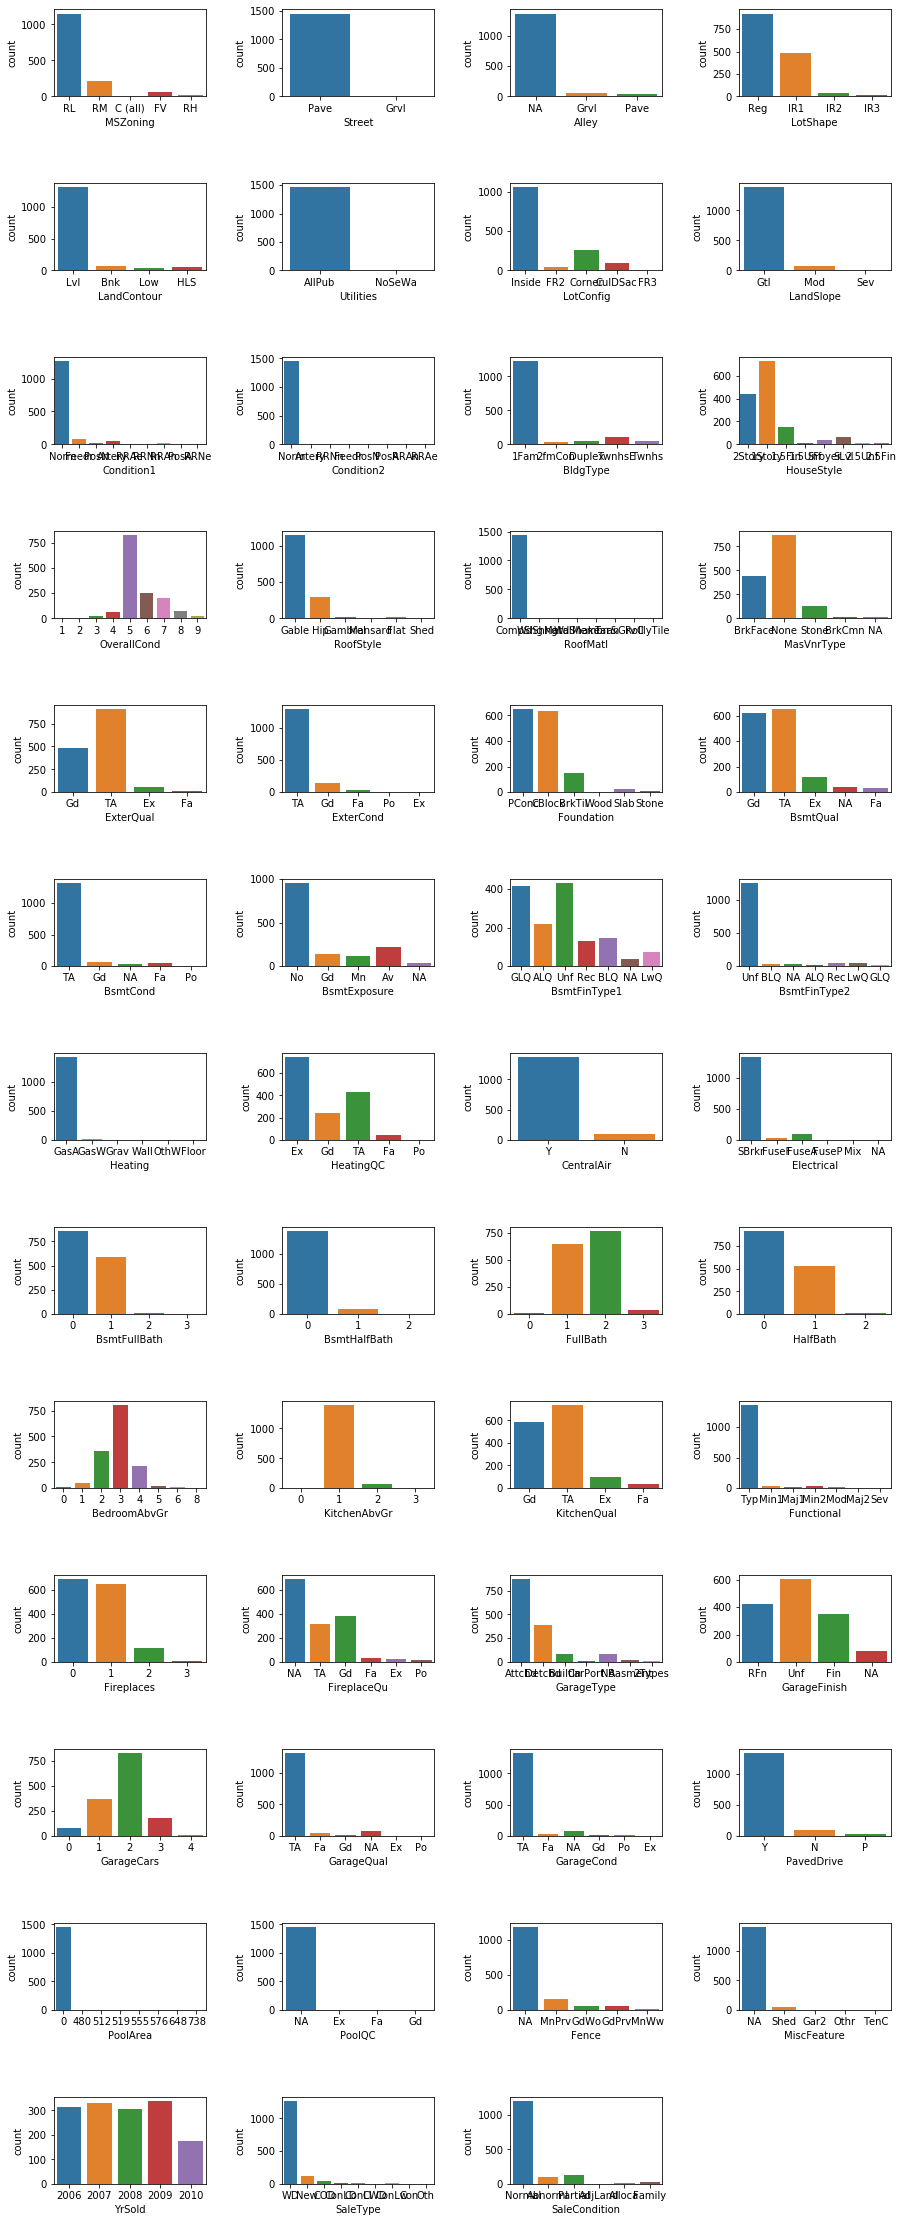

In [53]:
L = ['MSZoning', 
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 
'BldgType', 'HouseStyle', 'OverallCond', 
'RoofStyle', 'RoofMatl', 
'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
'BsmtFinType2', 'Heating', 
'HeatingQC', 'CentralAir', 'Electrical', 
'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 
'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 
'PavedDrive', 
'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 
'YrSold', 'SaleType', 'SaleCondition'
]
fig = plt.figure(figsize = (15,40))
fig.subplots_adjust(hspace=1, wspace=0.5)

_len = len(L)


for i in range(_len):
    ax = fig.add_subplot(13, 4, i+1)
    sns.countplot(data = _data, x = L[i])
    
plt.savefig("EDA-1.png")

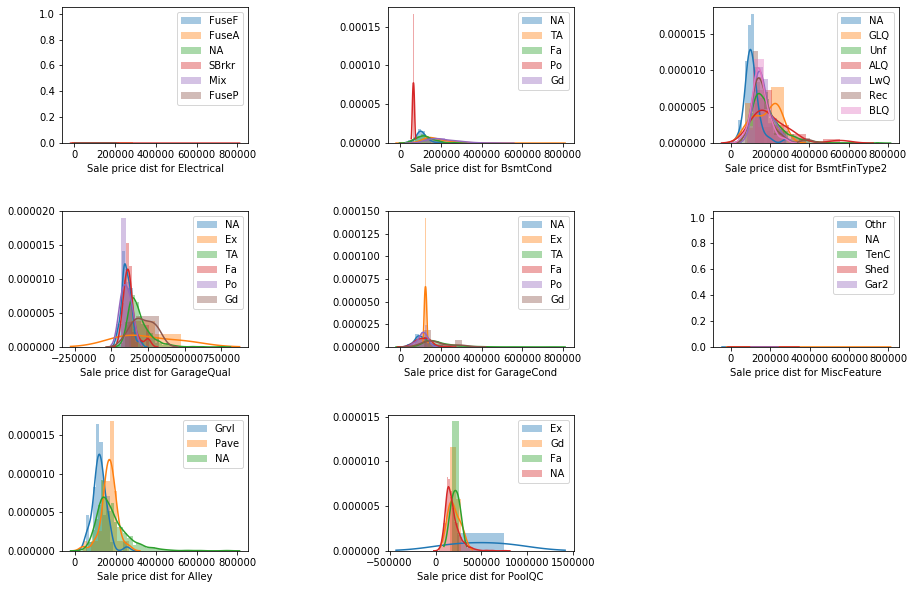

In [30]:
attribute = ['Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond', 'MiscFeature', 'Alley', 'PoolQC']


fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.75)
for i in range(len(attribute)):
    ax = fig.add_subplot(3, 3, i+1)
    L = list(set(_data[attribute[i]]))
    for x in L:
            sns.distplot(_data[_data[attribute[i]] == x]['SalePrice'], label = x)
    plt.plot()
    plt.xlabel("Sale price dist for {}".format(attribute[i]))
    plt.legend()

The distribution plot shows that the following parameters have no such relevant data on sale price 
['Electrical', 'MiscFeature']
These can be *safely* removed


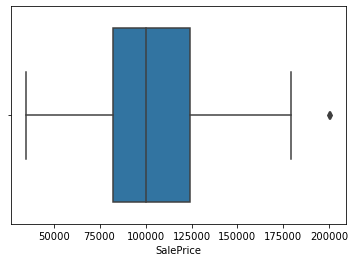

In [36]:
sns.boxplot(_data[_data['GarageQual'] == 'NA']['SalePrice'])
#sns.boxplot(_data[_data['GarageQual'] == 'Grvl']['SalePrice'], label = 'Grvl')

In [42]:
att = _data.columns
for a in att:
    res = list(set(_data[a]))
    print("{} --> {}".format(a, res[0:10]))

Id --> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MSSubClass --> [160, 70, 40, 75, 45, 80, 50, 20, 85, 180]
MSZoning --> ['RL', 'RM', 'RH', 'C (all)', 'FV']
LotFrontage --> [21.0, 24.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0]
LotArea --> [10240, 8197, 8198, 8199, 8200, 10246, 6155, 18450, 8212, 10261]
Street --> ['Grvl', 'Pave']
Alley --> ['Grvl', 'Pave', 'NA']
LotShape --> ['IR3', 'IR1', 'IR2', 'Reg']
LandContour --> ['Low', 'HLS', 'Bnk', 'Lvl']
Utilities --> ['AllPub', 'NoSeWa']
LotConfig --> ['Corner', 'FR3', 'FR2', 'Inside', 'CulDSac']
LandSlope --> ['Mod', 'Gtl', 'Sev']
Neighborhood --> ['NoRidge', 'Timber', 'NWAmes', 'Blueste', 'ClearCr', 'NPkVill', 'BrkSide', 'SawyerW', 'StoneBr', 'Veenker']
Condition1 --> ['RRNe', 'Feedr', 'RRNn', 'RRAe', 'RRAn', 'Norm', 'PosN', 'Artery', 'PosA']
Condition2 --> ['Feedr', 'RRNn', 'RRAe', 'RRAn', 'Norm', 'PosN', 'Artery', 'PosA']
BldgType --> ['Duplex', '2fmCon', '1Fam', 'TwnhsE', 'Twnhs']
HouseStyle --> ['SLvl', '2.5Fin', 'SFoyer', '1.5Fin', '1.5Un